In [1]:
import numpy as np
import pandas as pd
import random as rd


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.linear_model import Perceptron


In [6]:
train_df = pd.read_csv('train.csv')

In [7]:
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.tail()


PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [10]:
test_df.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [11]:
train_df.info()
print("__"*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [12]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
train_df.describe(include=['O'])

Name   Sex    Ticket        Cabin Embarked
count                         891   891       891          204      889
unique                        891     2       681          147        3
top     Graham, Mr. George Edward  male  CA. 2343  C23 C25 C27        S
freq                            1   577         7            4      644

In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [15]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [16]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [17]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [18]:
train_df[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)


Age  Survived
0    0.42  1.000000
9    5.00  1.000000
79  63.00  1.000000
68  53.00  1.000000
1    0.67  1.000000
17  13.00  1.000000
16  12.00  1.000000
87  80.00  1.000000
2    0.75  1.000000
4    0.92  1.000000
3    0.83  1.000000
7    3.00  0.833333
20  15.00  0.800000
5    1.00  0.714286
8    4.00  0.700000
10   6.00  0.666667
63  48.00  0.666667
64  49.00  0.666667
47  35.00  0.611111
35  27.00  0.611111
74  58.00  0.600000
31  24.00  0.500000
65  50.00  0.500000
70  55.00  0.500000
72  56.00  0.500000
76  60.00  0.500000
78  62.00  0.500000
43  32.50  0.500000
42  32.00  0.500000
67  52.00  0.500000
..    ...       ...
13   9.00  0.250000
15  11.00  0.250000
27  21.00  0.208333
25  20.00  0.200000
57  43.00  0.200000
50  37.00  0.166667
62  47.00  0.111111
84  70.50  0.000000
83  70.00  0.000000
80  64.00  0.000000
81  65.00  0.000000
85  71.00  0.000000
86  74.00  0.000000
75  59.00  0.000000
77  61.00  0.000000
82  66.00  0.000000
40  30.50  0.000000
14  10.00  0.000000
73  57.00  0.000000
71  55.50  0.000000
19  14.50  0.000000
61  46.00  0.000000
60  45.50  0.000000
32  24.50  0.000000
54  40.50  0.000000
37  28.50  0.000000
49  36.50  0.000000
46  34.50  0.000000
26  20.50  0.000000
30  23.50  0.000000

[88 rows x 2 columns]

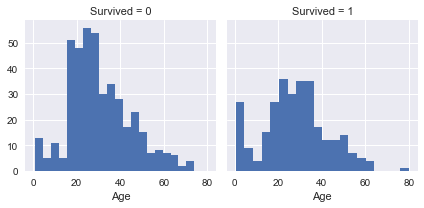

In [19]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

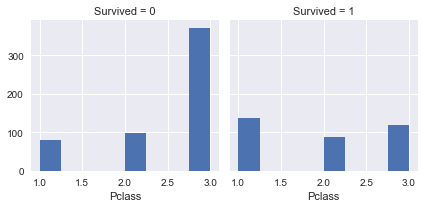

In [20]:
g = sns.FacetGrid(train_df, col='Survived', )
g.map(plt.hist, 'Pclass', bins=8)

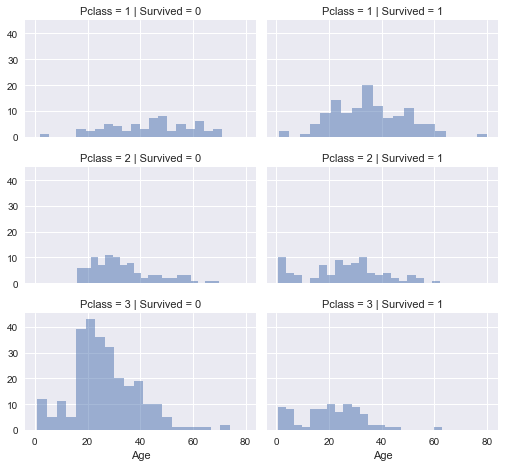

In [21]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

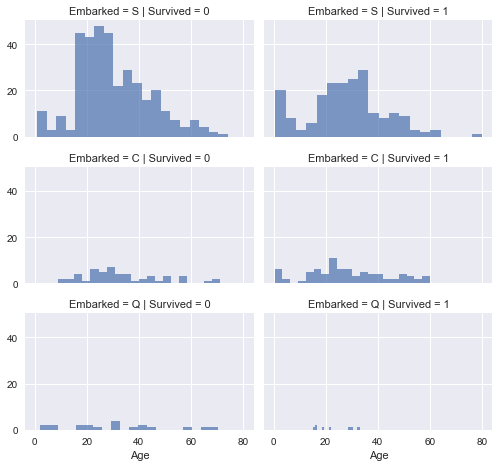

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)

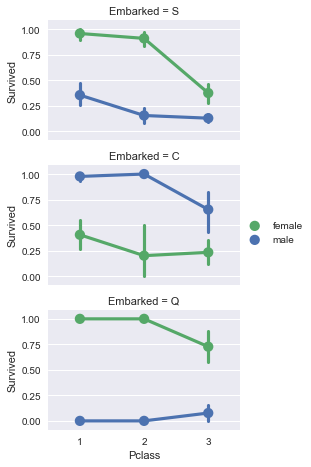

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked',size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()


In [24]:
print("Before : ", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After : ", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

('Before : ', (891, 12), (418, 11), (891, 12), (418, 11))
('After : ', (891, 10), (418, 9), (891, 10), (418, 9))


In [25]:
pd.crosstab(train_df['Sex'], train_df['Survived'])


Survived    0    1
Sex               
female     81  233
male      468  109

In [26]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [28]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()


Sex  Survived
0  female  0.742038
1    male  0.188908

In [29]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Age','Survived']].groupby(['Title'], as_index=False).mean()

Title        Age  Survived
0  Master   4.574167  0.575000
1    Miss  21.845638  0.702703
2      Mr  32.368090  0.156673
3     Mrs  35.788991  0.793651
4    Rare  45.545455  0.347826

In [30]:
train_df.groupby(['Title','Survived'], as_index=False).count()

Title  Survived  PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Fare  \
0  Master         0           17      17    17   17   15     17     17    17   
1  Master         1           23      23    23   23   21     23     23    23   
2    Miss         0           55      55    55   55   41     55     55    55   
3    Miss         1          130     130   130  130  108    130    130   130   
4      Mr         0          436     436   436  436  331    436    436   436   
5      Mr         1           81      81    81   81   67     81     81    81   
6     Mrs         0           26      26    26   26   23     26     26    26   
7     Mrs         1          100     100   100  100   86    100    100   100   
8    Rare         0           15      15    15   15   14     15     15    15   
9    Rare         1            8       8     8    8    8      8      8     8   

   Embarked  
0        17  
1        23  
2        55  
3       129  
4       436  
5        81  
6        26  
7        99  
8        15  
9         8

In [31]:
title_mapping = {"Mr": 1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

In [32]:
train_df[['Title','PassengerId']].groupby(['Title'], as_index=False).count()

Title  PassengerId
0      1          517
1      2          185
2      3          126
3      4           40
4      5           23

In [33]:
test_df.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked  Title  
0  34.5      0      0   7.8292        Q      1  
1  47.0      1      0   7.0000        S      3  
2  62.0      0      0   9.6875        Q      1  
3  27.0      0      0   8.6625        S      1  
4  22.0      1      1  12.2875        S      3

In [34]:
train_df = train_df.drop(['Name','PassengerId'], axis=1)
#test_df = test_df.drop(['PassengerId'], axis=1)

combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 10))

In [35]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female":1, "male":0}).astype(int)

train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1

In [36]:
test_df.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch     Fare Embarked  Title  
0  34.5      0      0   7.8292        Q      1  
1  47.0      1      0   7.0000        S      3  
2  62.0      0      0   9.6875        Q      1  
3  27.0      0      0   8.6625        S      1  
4  22.0      1      1  12.2875        S      3

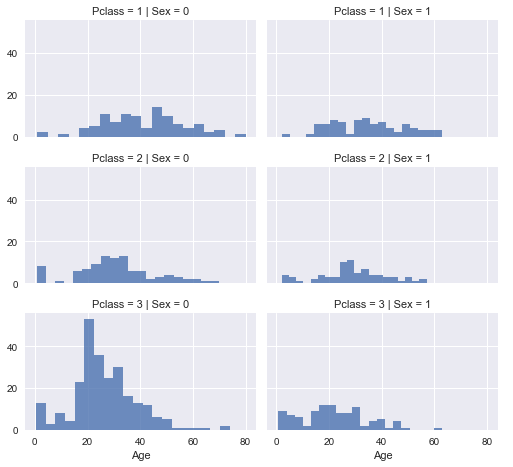

In [37]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.8, bins=20)

grid.add_legend()

In [38]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [39]:
for dataset in combine:
    print(dataset)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Title
0           0       3    0  22.0      1      0    7.2500        S      1
1           1       1    1  38.0      1      0   71.2833        C      3
2           1       3    1  26.0      0      0    7.9250        S      2
3           1       1    1  35.0      1      0   53.1000        S      3
4           0       3    0  35.0      0      0    8.0500        S      1
5           0       3    0   NaN      0      0    8.4583        Q      1
6           0       1    0  54.0      0      0   51.8625        S      1
7           0       3    0   2.0      3      1   21.0750        S      4
8           1       3    1  27.0      0      2   11.1333        S      3
9           1       2    1  14.0      1      0   30.0708        C      3
10          1       3    1   4.0      1      1   16.7000        S      2
11          1       1    1  58.0      0      0   26.5500        S      2
12          0       3    0  20.0      0      0    8

In [40]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

            

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      1
1         1       1    1   38      1      0  71.2833        C      3
2         1       3    1   26      0      0   7.9250        S      2
3         1       1    1   35      1      0  53.1000        S      3
4         0       3    0   35      0      0   8.0500        S      1

In [41]:
train_df['Ageband'] = pd.cut(train_df['Age'], 5)
train_df[['Ageband','Survived']].groupby('Ageband',as_index=False).mean().sort_values(by='Ageband', ascending=True)

Ageband  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.337374
2   (32.0, 48.0]  0.412037
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] =4
    
train_df.head()
    

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

        Ageband  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

<bound method FacetGrid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x0000000011926390>>

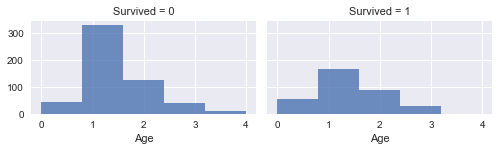

In [43]:
grid = sns.FacetGrid(train_df, col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.8, bins=5)
grid.add_legend

In [44]:
train_df[['Age','Survived']].groupby('Age', as_index=False).mean().sort_values(by='Age', ascending=True)

Age  Survived
0    0  0.550000
1    1  0.337374
2    2  0.412037
3    3  0.434783
4    4  0.090909

In [45]:
train_df = train_df.drop(['Ageband'], axis=1)
combine= [train_df, test_df]
train_df.head()


Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      1
1         1       1    1    2      1      0  71.2833        C      3
2         1       3    1    1      0      0   7.9250        S      2
3         1       1    1    2      1      0  53.1000        S      3
4         0       3    0    2      0      0   8.0500        S      1

In [46]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[['FamilySize','Survived']].groupby('FamilySize', as_index=False).count()


FamilySize  Survived
0           1       537
1           2       161
2           3       102
3           4        29
4           5        15
5           6        22
6           7        12
7           8         6
8          11         7

In [47]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

IsAlone  Survived
0        0  0.505650
1        1  0.303538

In [48]:
train_df = train_df.drop(['SibSp','Parch','FamilySize'], axis=1)

In [49]:

test_df = test_df.drop(['SibSp','Parch','FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1

In [50]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class  Age  Pclass
0          3    1       3
1          2    2       1
2          3    1       3
3          2    2       1
4          6    2       3
5          3    1       3
6          3    3       1
7          0    0       3
8          3    1       3
9          0    0       2

In [51]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [52]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [53]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
train_df.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6

In [54]:
test_df.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

   Age     Fare  Embarked  Title  IsAlone  Age*Class  
0    2   7.8292         2      1        1          6  
1    2   7.0000         0      3        0          6  
2    3   9.6875         2      1        1          6  
3    1   8.6625         0      1        1          3  
4    1  12.2875         0      3        0          3

In [55]:
freq_fare = train_df.Fare.dropna().mode()[0]

In [56]:
train_df[['Fare','Survived']].groupby('Fare', as_index=False).count()
    

Fare  Survived
0      0.0000        15
1      4.0125         1
2      5.0000         1
3      6.2375         1
4      6.4375         1
5      6.4500         1
6      6.4958         2
7      6.7500         2
8      6.8583         1
9      6.9500         1
10     6.9750         2
11     7.0458         1
12     7.0500         7
13     7.0542         2
14     7.1250         4
15     7.1417         1
16     7.2250        12
17     7.2292        15
18     7.2500        13
19     7.3125         1
20     7.4958         3
21     7.5208         1
22     7.5500         4
23     7.6292         1
24     7.6500         4
25     7.7250         1
26     7.7292         1
27     7.7333         4
28     7.7375         2
29     7.7417         1
..        ...       ...
218   80.0000         2
219   81.8583         1
220   82.1708         2
221   83.1583         3
222   83.4750         2
223   86.5000         3
224   89.1042         2
225   90.0000         4
226   91.0792         2
227   93.5000         2
228  106.4250         2
229  108.9000         2
230  110.8833         4
231  113.2750         3
232  120.0000         4
233  133.6500         2
234  134.5000         2
235  135.6333         3
236  146.5208         2
237  151.5500         4
238  153.4625         3
239  164.8667         2
240  211.3375         3
241  211.5000         1
242  221.7792         1
243  227.5250         4
244  247.5208         2
245  262.3750         2
246  263.0000         4
247  512.3292         3

[248 rows x 2 columns]

In [57]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(freq_fare)
    
train_df[['Fare','Survived']].groupby('Fare', as_index=False).count()
    

Fare  Survived
0      0.0000        15
1      4.0125         1
2      5.0000         1
3      6.2375         1
4      6.4375         1
5      6.4500         1
6      6.4958         2
7      6.7500         2
8      6.8583         1
9      6.9500         1
10     6.9750         2
11     7.0458         1
12     7.0500         7
13     7.0542         2
14     7.1250         4
15     7.1417         1
16     7.2250        12
17     7.2292        15
18     7.2500        13
19     7.3125         1
20     7.4958         3
21     7.5208         1
22     7.5500         4
23     7.6292         1
24     7.6500         4
25     7.7250         1
26     7.7292         1
27     7.7333         4
28     7.7375         2
29     7.7417         1
..        ...       ...
218   80.0000         2
219   81.8583         1
220   82.1708         2
221   83.1583         3
222   83.4750         2
223   86.5000         3
224   89.1042         2
225   90.0000         4
226   91.0792         2
227   93.5000         2
228  106.4250         2
229  108.9000         2
230  110.8833         4
231  113.2750         3
232  120.0000         4
233  133.6500         2
234  134.5000         2
235  135.6333         3
236  146.5208         2
237  151.5500         4
238  153.4625         3
239  164.8667         2
240  211.3375         3
241  211.5000         1
242  221.7792         1
243  227.5250         4
244  247.5208         2
245  262.3750         2
246  263.0000         4
247  512.3292         3

[248 rows x 2 columns]

In [58]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1   7.2500         0      1        0          3
1         1       1    1    2  71.2833         1      3        0          2
2         1       3    1    1   7.9250         0      2        1          3
3         1       1    1    2  53.1000         0      3        0          2
4         0       3    0    2   8.0500         0      1        1          6

In [59]:
train_df['Fare'].median()

14.4542

In [60]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

   Age     Fare  Embarked  Title  IsAlone  Age*Class  
0    2   7.8292         2      1        1          6  
1    2   7.0000         0      3        0          6  
2    3   9.6875         2      1        1          6  
3    1   8.6625         0      1        1          3  
4    1  12.2875         0      3        0          3

In [61]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [62]:
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)
test_df[['FareBand', 'Age']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand       Age
0    (-0.001, 7.896]  1.131579
1    (7.896, 14.454]  1.134021
2   (14.454, 31.472]  1.313725
3  (31.472, 512.329]  1.704762

In [63]:
for dataset in combine:
    dataset.loc[ dataset['Fare']<= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare']<=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare']<=31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0 ), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop('FareBand', axis=1)
combine = [train_df + test_df]

train_df.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6

In [64]:
test_df = test_df.drop('FareBand', axis=1)
combine = [train_df + test_df]

test_df.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

   Age  Fare  Embarked  Title  IsAlone  Age*Class  
0    2     0         2      1        1          6  
1    2     0         0      3        0          6  
2    3     1         2      1        1          6  
3    1     1         0      1        1          3  
4    1     1         0      3        0          3

In [65]:
test_df = test_df.drop(['Name'], axis=1)

In [66]:
test_df.head()

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6
3          895       3    0    1     1         0      1        1          3
4          896       3    1    1     1         0      3        0          3

In [67]:
train_df.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6

In [68]:
test_df.head()

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0         2      1        1          6
1          893       3    1    2     0         0      3        0          6
2          894       2    0    3     1         2      1        1          6
3          895       3    0    1     1         0      1        1          3
4          896       3    1    1     1         0      3        0          3

In [69]:
train_df[['Pclass']].count()

Pclass    891
dtype: int64

In [72]:
X_train = train_df.drop(['Survived'], axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891L,), (418, 8))

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.26

In [75]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1        Sex     2.200978
5      Title     0.414362
4   Embarked     0.281026
6    IsAlone     0.262084
3       Fare    -0.022062
7  Age*Class    -0.085959
2        Age    -0.371647
0     Pclass    -1.083515

In [76]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.5

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
knn_acc = round(knn.score(X_train, Y_train)*100, 2)

In [78]:
knn_acc

84.06

In [79]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_predict = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100, 2)
acc_gaussian

76.88

In [80]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

78.79

In [82]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
acc_linear_svc

79.46

In [83]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

78.23

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

86.64

In [86]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

86.64

In [89]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochatic Gradient Decent', 'Decision Tree', 'Random Forest'], 
    'Score': [acc_svc, knn_acc , acc_log, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
})
models.sort_values(by='Score', ascending=False)

Model  Score
7              Decision Tree  86.64
8              Random Forest  86.64
1                        KNN  84.06
0     Support Vector Machine  83.50
2        Logistic Regression  81.26
5                 Linear SVC  79.46
4                 Perceptron  78.79
6  Stochatic Gradient Decent  78.23
3                Naive Bayes  76.88

In [91]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1